In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.listdir("C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Logistic Regression")

['.ipynb_checkpoints',
 '01-Logistic Regression with Python.ipynb',
 'Churn.csv',
 'Churn_Modelling.csv',
 'Logistic Regression (Balanced Data).ipynb',
 'Logistic Regression (Cross validation ) .ipynb',
 'Logistic Regression (MinMax & Cross validation ) .ipynb',
 'Logistic Regression (MinMax Scaling Variables).ipynb',
 'Logistic Regression (Standard Scaling & Cross validation ) .ipynb',
 'Logistic Regression (Standard Scaling variables) .ipynb',
 'Logistic Regression with Python.ipynb',
 'LR.pdf',
 'titanic_train.csv',
 'Way to Logistic Regression.xlsx']

In [3]:
#Reading data
Data = pd.read_csv('C:\\Users\\jaych\\Downloads\\iAnalyst\\ML\\Logistic Regression\\Churn_Modelling.csv')
df = Data.copy()
df = df.iloc[:,3:]
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [4]:
#Selecting object data type columns
cat = df.columns[df.dtypes == 'object']
num_col = df.drop(cat,axis=1)

In [5]:
#Binning  data after converting them to category type
cat_col = df[cat].astype('category').apply(lambda x:x.cat.codes)
cat_col

Geography  Gender
0             0       0
1             2       0
2             0       0
3             0       0
4             2       0
...         ...     ...
9995          0       1
9996          0       1
9997          0       0
9998          1       1
9999          0       0

[10000 rows x 2 columns]

In [6]:
#Final Dataframe with all numeric features
df = pd.concat([num_col,cat_col],axis=1)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography  Gender  
0               1        101348.88       1          0       0  
1               1        112542.58       0          2       0  
2               0        113931.57       1          0       0  
3               0         93826.63       0          0       0  
4               1         79084.10       0          2       0

In [7]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [8]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
x = pd.DataFrame(MinMax.fit_transform(X),columns=X.columns)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
from io import StringIO
from IPython.display import Image
import pydot
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve

<AxesSubplot:>

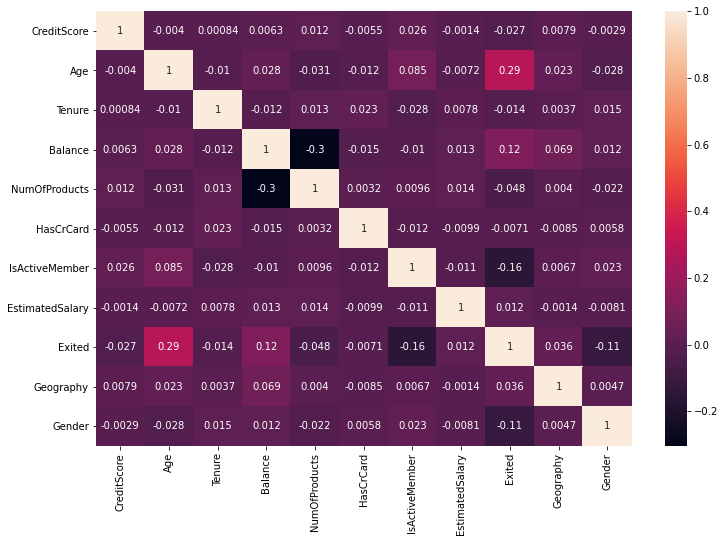

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=101)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=101)

NameError: name 'x' is not defined

In [11]:
#Fitting Decision Tree
dtree = DecisionTreeClassifier(min_samples_leaf=20)#min_samples_split=25,
dtree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20)

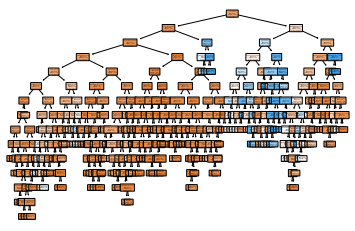

In [12]:
plot_tree(dtree,feature_names=X.columns,class_names=['Yes','No'],filled=True,rounded=True);

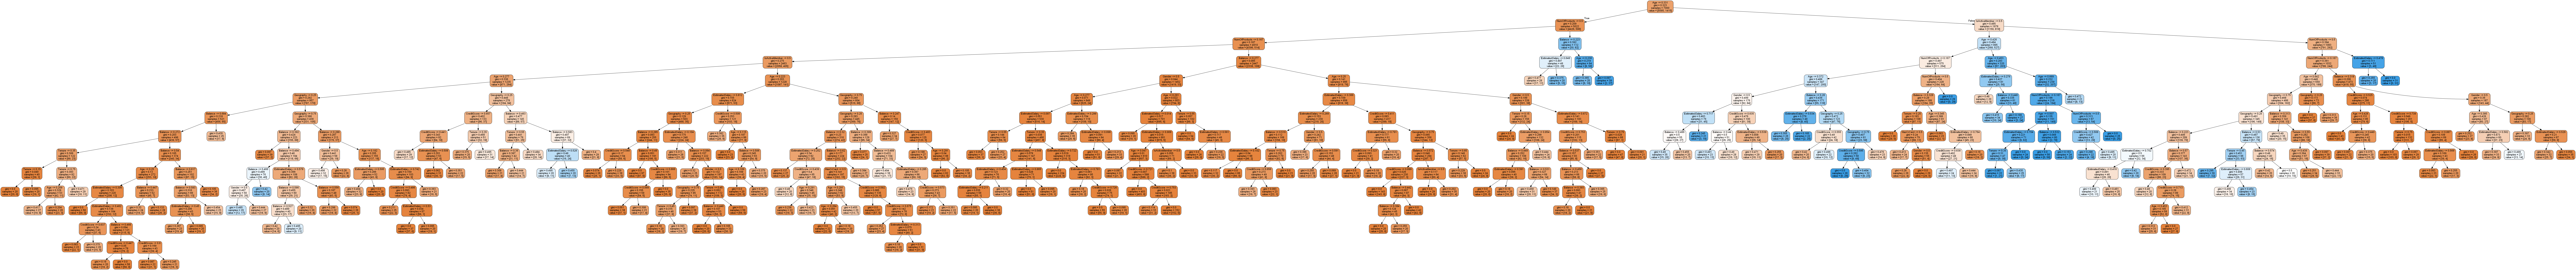

In [47]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#### Training Data

In [13]:
pred = dtree.predict(X_train)
print('Accuracy Score = ',accuracy_score(y_train,pred))
print('AUC score = ',roc_auc_score(y_train,pred))
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))

Accuracy Score =  0.8701428571428571
AUC score =  0.7352585009695962
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5585
           1       0.77      0.51      0.61      1415

    accuracy                           0.87      7000
   macro avg       0.83      0.74      0.77      7000
weighted avg       0.86      0.87      0.86      7000

[[5371  214]
 [ 695  720]]


#### Testing Data

In [14]:
y_pred = dtree.predict(X_test)
print('Accuracy Score = ',accuracy_score(y_test,y_pred))
print('AUC score = ',roc_auc_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score =  0.8466666666666667
AUC score =  0.7127351742527294
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2378
           1       0.68      0.48      0.57       622

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000

[[2239  139]
 [ 321  301]]


In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

Text(0.5, 1.0, 'Receiver operating characteristic')

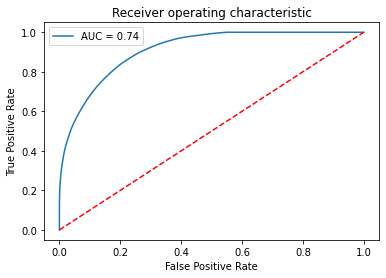

In [19]:
AUC = roc_auc_score(y_train,pred) 
fpr , tpr , threshold = roc_curve(y_train,dtree.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % AUC)
plt.plot([0,1],'r--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

Text(0.5, 1.0, 'Receiver operating characteristic')

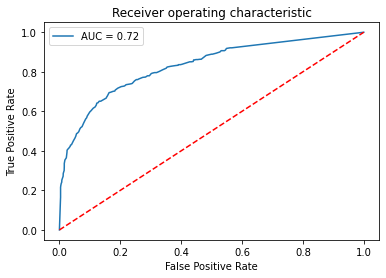

In [20]:
AUC = roc_auc_score(y_test,y_pred) 
fpr , tpr , threshold = roc_curve(y_test,dtree.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % AUC)
plt.plot([0,1],'r--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [21]:
from tqdm import tqdm
tr_error = []
ts_error = []
for i in tqdm(range(2,500)):
        dtree = DecisionTreeClassifier(min_samples_leaf=i)
        dtree.fit(X_train,y_train)
        pred = dtree.predict(X_train)
        y_pred = dtree.predict(X_test)
        tr_roc = roc_auc_score(y_train,pred)
        ts_roc = roc_auc_score(y_test,y_pred)
        tr_error.append(1 - tr_roc)
        ts_error.append(1 - ts_roc)
        

100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [00:12<00:00, 41.34it/s]


Text(0.5, 0, 'Min_samples_split')

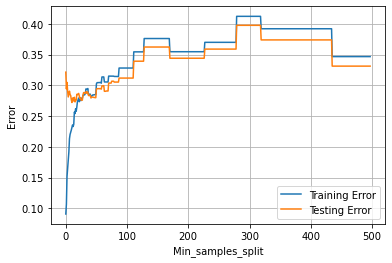

In [22]:
plt.plot(tr_error,label = 'Training Error')
plt.plot(ts_error,label = 'Testing Error')
plt.grid()
plt.ylabel('Error')
plt.legend()
plt.xlabel('Min_samples_split')

Text(0.5, 0, 'Min_samples_split')

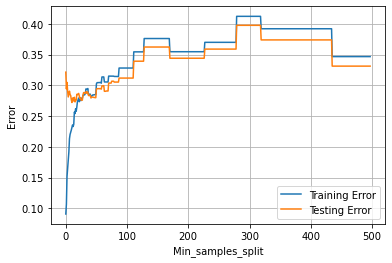

In [23]:
plt.plot(tr_error,label = 'Training Error')
plt.plot(ts_error,label = 'Testing Error')
plt.grid()
plt.ylabel('Error')
plt.legend()
plt.xlabel('Min_samples_split')

In [39]:
        dtree = DecisionTreeClassifier(min_samples_leaf=27) #
        dtree.fit(X_train,y_train)
        pred = dtree.predict(X_train)
        y_pred = dtree.predict(X_test)
        tr_roc = roc_auc_score(y_train,pred)
        ts_roc = roc_auc_score(y_test,y_pred)
        print(classification_report(y_train,pred))
        print(tr_roc)        
        print(classification_report(y_test,y_pred))
        print(ts_roc)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5585
           1       0.76      0.49      0.59      1415

    accuracy                           0.87      7000
   macro avg       0.82      0.72      0.76      7000
weighted avg       0.86      0.87      0.85      7000

0.7247425746019596
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2378
           1       0.70      0.50      0.59       622

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.84      3000

0.724026377917621


## Cost Complexity Pruning Part 1: Visualize alpha


Decision Trees are notorious for being overfit to the Training Dataset, and there are a lot of parameters, like max_depth and min_samples, that are designed to reduce overfitting. However, pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that impoves the accuracy with the Testing Dataset.

Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both the Training Dataset and the Testing Dataset.

First, let's extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. NOTE: We omit the maximum value for alpha with ccp_alphas = ccp_alphas [:-1] because it would prune all leaves, leaving us with only a root instead of a tree.

In [77]:
path = dtree.cost_complexity_pruning_path(X_train,y_train) #determine values of alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  #exclude maximum value of alpha

clf_dts = []  #create an   array to save decision trees

for alpha in tqdm(ccp_alphas):
    clf_dt = DecisionTreeClassifier(random_state=101,ccp_alpha=alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

100%|████████████████████████████████████████████████████████████████████████████████| 137/137 [00:12<00:00, 11.37it/s]


In [78]:
clf_dts

[DecisionTreeClassifier(random_state=101),
 DecisionTreeClassifier(ccp_alpha=7.1428571428569835e-06, random_state=101),
 DecisionTreeClassifier(ccp_alpha=7.687714584265603e-06, random_state=101),
 DecisionTreeClassifier(ccp_alpha=9.183673469388015e-06, random_state=101),
 DecisionTreeClassifier(ccp_alpha=9.27318295739361e-06, random_state=101),
 DecisionTreeClassifier(ccp_alpha=9.403761504602002e-06, random_state=101),
 DecisionTreeClassifier(ccp_alpha=1.0261569416499102e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=1.0476190476190036e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=1.2884505605429891e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=2.0084224165856958e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=2.4052478134110964e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=2.6445738169877486e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=2.7481447124304422e-05, random_state=101),
 DecisionTreeClassifier(ccp_alpha=2.85

In [79]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

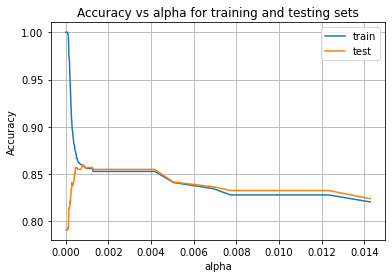

In [80]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores,label = 'train')
ax.plot(ccp_alphas,test_scores,label = 'test')
ax.grid()
ax.legend()

in the graph above, we see that the accuracy for the Testing Dataset hits its maximum value when alpha is about 0.001. After this value for alpha, the accuracy of the Training Dataset drops off and that suggests we should set ccp_alpha=0.001.

NOTE: When we apply Cost Complexity Pruning to a Classification Tree, values for alpha go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for alpha for a Regression Tree can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infinity

Since there are many ways we could have divided the original dataset into Training and Testing datasets, how do we know we used the best Training Dataset and how do we know we used the best Testing Dataset? Typically, we answer this question with 10-Fold Cross Validation. So that's what we're going to do now, and we'll do it with the cross_val_score() function.

## Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

The graph we just drew suggested one value for alpha, 0.016, but another set of data might suggest another optimal value.

First, let's demonstrate that different training and testing datasets result in trees with different accuracies when we set ccp_alpha-0.016. We will do this by using the cross_val_score() function to generate different training and testing datasets and then train and test the tree with those datasets.

In [82]:
from sklearn.model_selection import cross_val_score

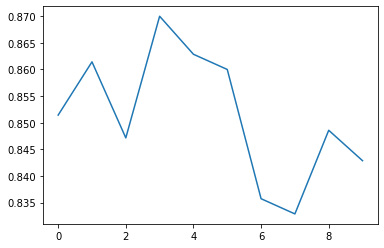

In [85]:
clf_dt = DecisionTreeClassifier(random_state=101,ccp_alpha=0.0012)

#now use 10-fold cross validation create 5 different trainng and 
#testing datasets that are used to train and test the tree.
scores = cross_val_score(clf_dt, X_train ,y_train, cv = 10)

fig, ax = plt.subplots()
ax.set_xlabel('Decision Tree')
ax.set_ylabel('Accuracy')
ax.plot(scores)


The graph above shows that using different Training and Testing data with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to the datasets. So, instead of picking a single Training dataset and single Testing dataset, let's use cross validation to find the optimal value for ccp_alpha.

In [1]:
alpha_loop_values = []

##for each candidtae value for alpha, we will run 5-fold cross validation.
#Then we will store mean and std of scores for each call
#to cross_val_score in alpha_loop_values
for alpha in tqdm(ccp_alphas):
    clf_dt = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)
    alpha_loop_values.append([alpha,np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',grid = True,y = 'mean_accuracy', yerr = 'std',marker='o',linestyle = '--')    

NameError: name 'tqdm' is not defined

<AxesSubplot:xlabel='alpha'>

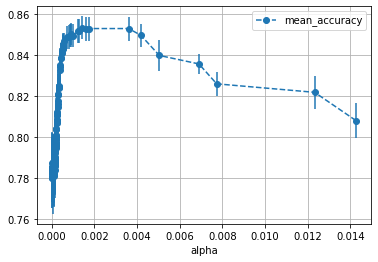

In [38]:
        clf_dt = DecisionTreeClassifier(ccp_alpha=0.0015,min_samples_leaf=27,random_state=101)
        clf_dt.fit(X_train,y_train)
        pred = clf_dt.predict(X_train)
        y_pred = clf_dt.predict(X_test)
        tr_roc = roc_auc_score(y_train,pred)
        ts_roc = roc_auc_score(y_test,y_pred)
        print(tr_roc)
        print(classification_report(y_train,pred))
        print(ts_roc)
        print(classification_report(y_test,y_pred))

0.6985704388648292
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5585
           1       0.72      0.44      0.55      1415

    accuracy                           0.85      7000
   macro avg       0.80      0.70      0.73      7000
weighted avg       0.84      0.85      0.84      7000

0.7102749209663068
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2378
           1       0.74      0.46      0.57       622

    accuracy                           0.85      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [21]:
from tqdm import tqdm
tr_error = []
ts_error = []
for i in tqdm(range(2,50)):
        dtree = DecisionTreeClassifier(min_samples_leaf=i)
        dtree.fit(X_train,y_train)
        pred = dtree.predict(X_train)
        y_pred = dtree.predict(X_test)
        tr_roc = roc_auc_score(y_train,pred)
        ts_roc = roc_auc_score(y_test,y_pred)
        tr_error.append(1 - tr_roc)
        ts_error.append(1 - ts_roc)
plt.plot(tr_error,label = 'Training Error')
plt.plot(ts_error,label = 'Testing Error')
plt.grid()
plt.ylabel('Error')
plt.legend()
plt.xlabel('Min_samples_split')      

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 13.63it/s]


Text(0.5, 0, 'Min_samples_split')

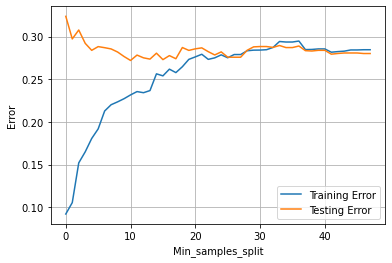

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.41it/s]


Text(0.5, 0, 'Min_samples_split')

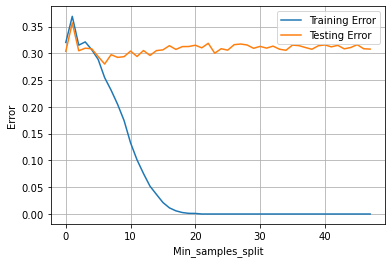

In [41]:
from tqdm import tqdm
tr_error = []
ts_error = []
for i in tqdm(range(2,50)):
        dtree = DecisionTreeClassifier(max_depth=i)#min_samples_leaf=20,ccp_alpha=0.0015,
        dtree.fit(X_train,y_train)
        pred = dtree.predict(X_train)
        y_pred = dtree.predict(X_test)
        tr_roc = roc_auc_score(y_train,pred)
        ts_roc = roc_auc_score(y_test,y_pred)
        tr_error.append(1 - tr_roc)
        ts_error.append(1 - ts_roc)
plt.plot(tr_error,label = 'Training Error')
plt.plot(ts_error,label = 'Testing Error')
plt.grid()
plt.ylabel('Error')
plt.legend()
plt.xlabel('Min_samples_split')

## Hyperparameter Tuning

### Grid Search Cross Validation

In [10]:
from sklearn.model_selection import GridSearchCV

In [17]:
dtree = DecisionTreeClassifier(random_state=101)

In [22]:
param_grid = {'min_samples_split':np.arange(2,50,5),'max_features':np.arange(1,len(X.columns)),'max_depth':np.arange(2,12,1),'min_samples_leaf':np.arange(2,50,5)}

In [23]:
GS = GridSearchCV(dtree,param_grid,cv=5)
GS

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])})

In [24]:
GS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])})

In [25]:
print(GS.best_score_)
print(GS.best_params_)
GS.best_estimator_

0.8537142857142858
{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=7,
                       random_state=101)

In [31]:
clf_dt = GS.best_estimator_
clf_dt.predict(X_test)
print(roc_auc_score(y_train,clf_dt.predict(X_train)))
roc_auc_score(y_test,clf_dt.predict(X_test))

0.6835842473055351


0.6979581047057837

### Random Search Cross Validation

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
dtree = DecisionTreeClassifier()
RS = RandomizedSearchCV(dtree,param_distributions=param_grid,cv=6)
RS.fit(X_train,y_train)

RandomizedSearchCV(cv=6, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [96]:
print(RS.best_score_)
print(RS.best_params_)
RS.best_estimator_

0.8502851182435992
{'min_samples_split': 2, 'min_samples_leaf': 32, 'max_features': 7, 'max_depth': 10}


DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=32)

In [13]:
DT = DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=32)
DT.fit(X_train,y_train)
pred = DT.predict(X_train)
print(confusion_matrix(y_train,pred))
print(roc_auc_score(y_train,pred))
y_pred = DT.predict(X_test)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[5419  166]
 [ 793  622]]
0.7049267504136205
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2378
           1       0.75      0.46      0.57       622

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000

0.7083210512224869
